# Train

In [2]:
# 加载数据
from train import *
args = get_arguments()
base_path = args["basepath"]
image_path = os.path.join(base_path, 'image')
gt_path = os.path.join(base_path, 'groundTruth')
gt_files = os.listdir(gt_path)
train_gt, val_gt = validation_split(gt_files, 0.2)
print("training on {} samples, validating on {} samples".format(len(train_gt), len(val_gt))) 


training on 94 samples, validating on 24 samples


In [4]:
# 初始化模型
save_dir = args["savedir"]
epoch = args["epoch"]
batch_obj = Logger('batch','batch.log','info')
logger_batch = batch_obj.log()

if args["pretrained"] == 0:
    model = seg_model(2)
    if args["optimizer"] == 'rms':
        optimizer = RMSprop(lr=args["lr"])
    elif args["optimizer"] == 'sgd':
        optimizer = SGD(lr=args["lr"], decay=1e-6, momentum=0.9, nesterov=False)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
else:
    model = load_model(args["modelfile"])


In [5]:
# 开始训练
epoch_count = 0
while epoch_count < epoch:
    #perform training
    batch_count = 0
    train_gen_object = load_gen_v2(image_path, gt_path, train_gt)#, args.batchsize, 2)
    for batch_train in train_gen_object:
        x,y = batch_train
        try:
            assert(x.shape[0] == y.shape[0])
            loss, accuracy = model.train_on_batch(x,y)
            print('training loss for epoch_no {} batch_number {} is loss:{}, accuracy:{}'.format(epoch_count, batch_count, loss, accuracy))
            logger_batch.info('training loss for epoch_no {} batch_number {} is loss:{}, accuracy:{}'.format(epoch_count, batch_count, loss, accuracy))
            batch_count+=1

        except Exception as e:
            print(e)
            continue

    #perform validation
    batch_count,total_loss = 0,0
    val_gen_object = load_gen_v2(image_path, gt_path, val_gt)#, args.batchsize, 2)
    for batch_val in val_gen_object:
        x,y = batch_val
        try:
            assert(x.shape[0] == y.shape[0])
            loss, accuracy = model.test_on_batch(x,y)
            batch_count+=1
            total_loss+=loss
        except Exception as e:
            print(e)
            continue
    print('validation loss for epoch_no {} is loss:{}, accuracy:{}'.format(epoch_count, (total_loss/batch_count), accuracy))
    logger_batch.info('validation loss for epoch_no {} is loss:{}, accuracy:{}'.format(epoch_count, (total_loss/batch_count), accuracy))

    filename = 'mymodel'+str(epoch_count)+'.h5'
    model.save(os.path.join(save_dir, filename))
    epoch_count+=1



training loss for epoch_no 0 batch_number 0 is loss:6.089797019958496, accuracy:0.5136999487876892
training loss for epoch_no 0 batch_number 1 is loss:4.918013572692871, accuracy:0.5605000257492065
training loss for epoch_no 0 batch_number 2 is loss:4.580524921417236, accuracy:0.5404000282287598
training loss for epoch_no 0 batch_number 3 is loss:4.450361251831055, accuracy:0.5928999781608582
training loss for epoch_no 0 batch_number 4 is loss:4.242040157318115, accuracy:0.5918999910354614
training loss for epoch_no 0 batch_number 5 is loss:3.888371706008911, accuracy:0.5842999815940857
training loss for epoch_no 0 batch_number 6 is loss:3.8940646648406982, accuracy:0.5961999893188477
training loss for epoch_no 0 batch_number 7 is loss:3.7588794231414795, accuracy:0.6062999963760376
training loss for epoch_no 0 batch_number 8 is loss:3.7951602935791016, accuracy:0.6553000807762146
training loss for epoch_no 0 batch_number 9 is loss:3.6668360233306885, accuracy:0.6563999652862549
train

training loss for epoch_no 0 batch_number 82 is loss:2.971269130706787, accuracy:0.8069999814033508
training loss for epoch_no 0 batch_number 83 is loss:2.9257335662841797, accuracy:0.8271000385284424
training loss for epoch_no 0 batch_number 84 is loss:2.943117618560791, accuracy:0.8256000280380249
training loss for epoch_no 0 batch_number 85 is loss:2.928898572921753, accuracy:0.8293998837471008
training loss for epoch_no 0 batch_number 86 is loss:2.940441846847534, accuracy:0.8143000602722168
training loss for epoch_no 0 batch_number 87 is loss:2.899949789047241, accuracy:0.8271999955177307
training loss for epoch_no 0 batch_number 88 is loss:2.929009437561035, accuracy:0.8050000071525574
training loss for epoch_no 0 batch_number 89 is loss:2.853126049041748, accuracy:0.8533000349998474
training loss for epoch_no 0 batch_number 90 is loss:2.896397590637207, accuracy:0.8291999697685242
training loss for epoch_no 0 batch_number 91 is loss:2.851135492324829, accuracy:0.8438000679016113

training loss for epoch_no 1 batch_number 76 is loss:2.430225372314453, accuracy:0.8314999938011169
training loss for epoch_no 1 batch_number 77 is loss:2.436903715133667, accuracy:0.8461000323295593
training loss for epoch_no 1 batch_number 78 is loss:2.425710439682007, accuracy:0.8336001038551331
training loss for epoch_no 1 batch_number 79 is loss:2.4795680046081543, accuracy:0.8037999868392944
training loss for epoch_no 1 batch_number 80 is loss:2.4045724868774414, accuracy:0.8598998785018921
training loss for epoch_no 1 batch_number 81 is loss:2.4202017784118652, accuracy:0.836199939250946
training loss for epoch_no 1 batch_number 82 is loss:2.4046339988708496, accuracy:0.8348000049591064
training loss for epoch_no 1 batch_number 83 is loss:2.3525502681732178, accuracy:0.8797000050544739
training loss for epoch_no 1 batch_number 84 is loss:2.4728057384490967, accuracy:0.8256000280380249
training loss for epoch_no 1 batch_number 85 is loss:2.3981456756591797, accuracy:0.85280001163

training loss for epoch_no 2 batch_number 65 is loss:2.2199552059173584, accuracy:0.7826999425888062
training loss for epoch_no 2 batch_number 66 is loss:2.0971314907073975, accuracy:0.8790000081062317
training loss for epoch_no 2 batch_number 67 is loss:2.09005069732666, accuracy:0.8445999622344971
training loss for epoch_no 2 batch_number 68 is loss:2.109118938446045, accuracy:0.8510000109672546
training loss for epoch_no 2 batch_number 69 is loss:2.0939087867736816, accuracy:0.8385999202728271
training loss for epoch_no 2 batch_number 70 is loss:2.054137706756592, accuracy:0.8660001158714294
training loss for epoch_no 2 batch_number 71 is loss:2.0478131771087646, accuracy:0.8648000359535217
training loss for epoch_no 2 batch_number 72 is loss:2.0551347732543945, accuracy:0.8575000166893005
training loss for epoch_no 2 batch_number 73 is loss:2.051374673843384, accuracy:0.8523000478744507
training loss for epoch_no 2 batch_number 74 is loss:2.060480833053589, accuracy:0.8553999066352

training loss for epoch_no 3 batch_number 53 is loss:1.763982892036438, accuracy:0.8858000040054321
training loss for epoch_no 3 batch_number 54 is loss:1.8090832233428955, accuracy:0.8337999582290649
training loss for epoch_no 3 batch_number 55 is loss:1.7673473358154297, accuracy:0.8615999817848206
training loss for epoch_no 3 batch_number 56 is loss:1.839763879776001, accuracy:0.8357000946998596
training loss for epoch_no 3 batch_number 57 is loss:2.112189769744873, accuracy:0.7497999668121338
training loss for epoch_no 3 batch_number 58 is loss:1.8286641836166382, accuracy:0.8716999888420105
training loss for epoch_no 3 batch_number 59 is loss:1.8220294713974, accuracy:0.8441001176834106
training loss for epoch_no 3 batch_number 60 is loss:1.7617418766021729, accuracy:0.8722999691963196
training loss for epoch_no 3 batch_number 61 is loss:1.8267061710357666, accuracy:0.8440999388694763
training loss for epoch_no 3 batch_number 62 is loss:1.806455135345459, accuracy:0.83340001106262

training loss for epoch_no 4 batch_number 45 is loss:1.6460907459259033, accuracy:0.840399980545044
training loss for epoch_no 4 batch_number 46 is loss:1.6818313598632812, accuracy:0.8716999888420105
training loss for epoch_no 4 batch_number 47 is loss:1.6614248752593994, accuracy:0.8138999938964844
training loss for epoch_no 4 batch_number 48 is loss:1.5695286989212036, accuracy:0.848300039768219
training loss for epoch_no 4 batch_number 49 is loss:1.5473594665527344, accuracy:0.8518000245094299
training loss for epoch_no 4 batch_number 50 is loss:1.6375377178192139, accuracy:0.8416999578475952
training loss for epoch_no 4 batch_number 51 is loss:1.6116347312927246, accuracy:0.8344999551773071
training loss for epoch_no 4 batch_number 52 is loss:1.5286203622817993, accuracy:0.9077999591827393
training loss for epoch_no 4 batch_number 53 is loss:1.5989735126495361, accuracy:0.8478000164031982
training loss for epoch_no 4 batch_number 54 is loss:1.58314847946167, accuracy:0.85310000181

# Test

In [6]:
# 加载测试集
from evaluate import *
base_path = args["basepath"]
image_path = os.path.join(base_path, 'image')
gt_path = os.path.join(base_path, 'groundTruth')
image_files = os.listdir(image_path)
test_images = get_test_files(image_path, gt_path)
gt_files = os.listdir(gt_path)
train_gt, val_gt = validation_split(gt_files, 0.2)


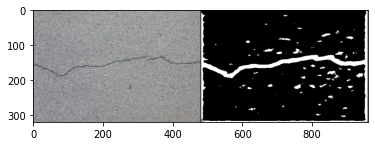

0.9954633823749427 0.10210050517800448 0.18520511248002847


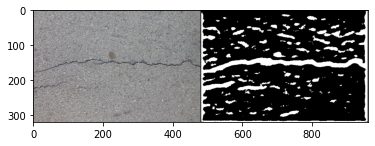

1.9880413136007824 0.17835107534387606 0.32682663975165294


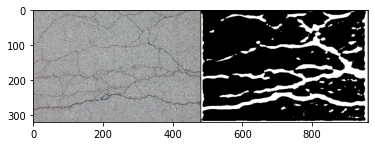

2.27524126641327 0.6622049487422182 0.6872752223538621


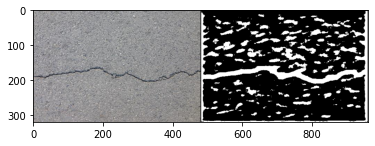

3.2717675360630634 0.7333082111249953 0.8200107833860895


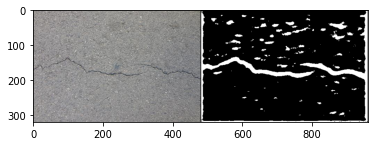

4.264670303278888 0.8143767630122835 0.9699088544467829


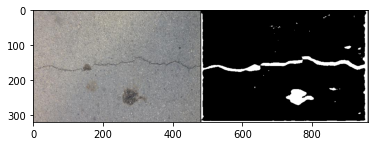

5.2496505396543975 0.9152429493556117 1.152901783265426


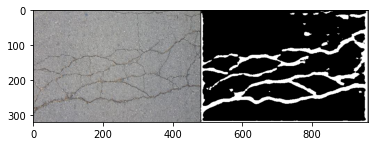

5.51535654898546 1.496420559405203 1.5175851886430658


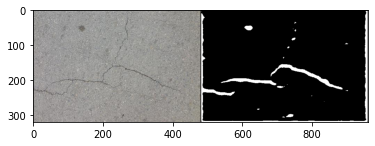

5.87060528877173 1.661072667057346 1.7425986369882596


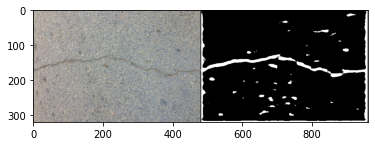

6.808777331151991 1.7797095328584305 1.9532359329268163


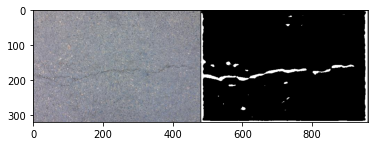

7.355760089536912 1.920023553187896 2.176572461159022


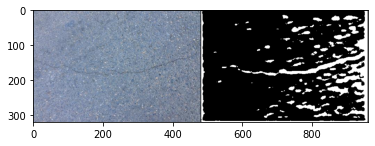

8.13184538978361 1.9636918625924955 2.259256553731433


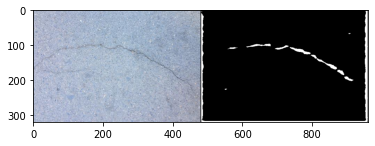

8.598470853030442 2.0739752397309292 2.437658890953764


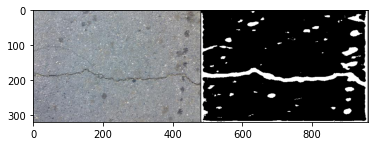

9.496101986322476 2.198155951334149 2.655836756785615


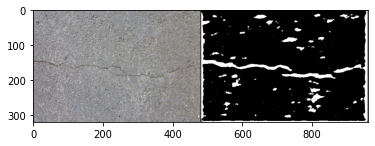

10.19452750077608 2.3093384706072095 2.847664429122956


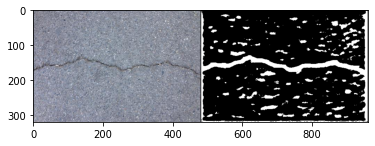

11.119211871292107 2.4029603686063448 3.017693080581132


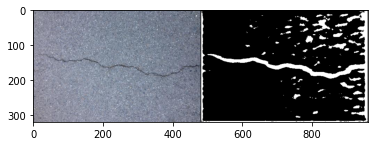

12.084263498801993 2.4690720238427084 3.141438950275739


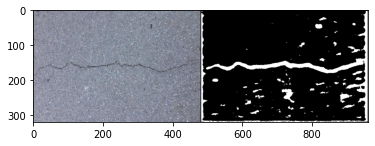

12.960286890102564 2.5619079187303613 3.309319534573123


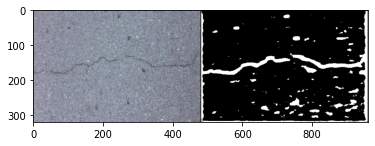

13.91662406356749 2.6572122034892116 3.4826541685880255


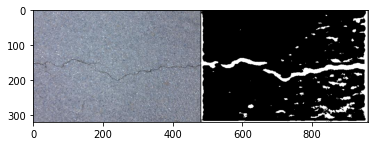

14.84742626752903 2.748712323878599 3.649274997636512


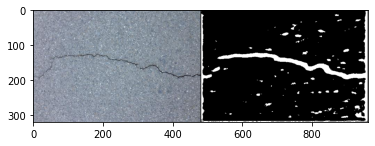

15.796175504290012 2.859160509111183 3.847137134258325


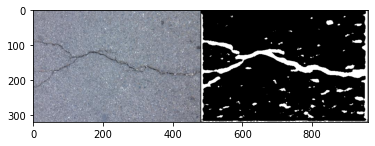

16.682561724599257 3.009210974505932 4.1037906054924465


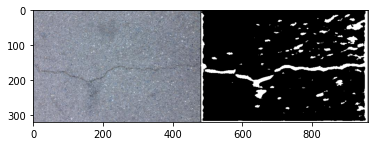

17.633522625228174 3.0977256549840644 4.265745192630369


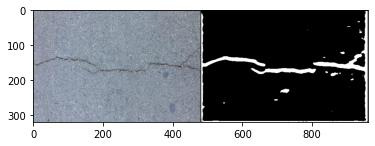

18.492456794170597 3.28226850730057 4.569556405247007


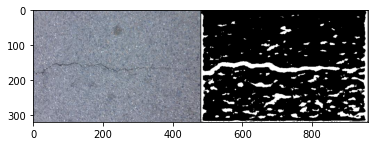

19.460978023329805 3.341018895858732 4.680337122183409
average precision:0.8108740843054085, average_recall:0.1392091206607805, average_F1_score0.19501404675764203


In [7]:
# 开始测试
tot_p, tot_r, tot_f = 0, 0, 0
count = 0
for gt_file in val_gt:
    #load the label
    mat_contents = sio.loadmat(os.path.join(gt_path, gt_file))
    seg_mask = mat_contents['groundTruth'][0][0][0]
    seg_mask[seg_mask == 1] = 0
    seg_mask[seg_mask > 1] = 1

    #load the image
    image_file = gt_file.split('.')[0] + '.jpg'
    img = mpimg.imread(os.path.join(image_path, image_file))
    img1 = apply_zeropad(img)
    m,n,p = img1.shape
    batch = get_batches(img1)
    try:
        a = 5000
        total_prediction = np.zeros((batch.shape[0], 25))
        for i in range(0,len(batch),a):
            prediction = model.predict_on_batch(batch[i:i+a])
            total_prediction[i:i+a] = prediction
    except Exception as e:
        print(e)
        continue
    out = infer(total_prediction,m,n)
    out_norm = np.zeros_like(out)
    out_norm = cv2.normalize(out, out_norm, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # show(out_norm)
    out_norm[out_norm>0.5] = 1
    out_norm[out_norm<0.5] = 0
    # show(out_norm)

    #save the output
    save_output(img, out_norm)
    precision, recall, F1 = calc_precision_recall(seg_mask, out_norm)
    tot_p+=precision 
    tot_r+=recall
    tot_f+=F1
    count+=1
    print(tot_p, tot_r, tot_f)
print("average precision:{}, average_recall:{}, average_F1_score{}".format(tot_p/count, tot_r/count, tot_f/count))
